## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sn
%matplotlib inline

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

In [39]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)

In [40]:
original_data.head()

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444


In [41]:
len(original_data[original_data.isna().any(axis=1)])

11

In [42]:
original_data = original_data.dropna()

In [43]:
y = original_data['outcome_type']
y = pd.DataFrame(np.where(y=='Adoption', 1, 0))
y.columns=['Adoption']
original_data.drop(columns=['outcome_type'])

,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Neutered Male,10.000000,Dog,Normal,Stray,Neutered Male,10.000000,2017,1.0,0.588194
1,Neutered Male,7.000000,Dog,Normal,Public Assist,Neutered Male,7.000000,2014,2.0,1.259722
2,Neutered Male,6.000000,Dog,Normal,Public Assist,Neutered Male,6.000000,2014,3.0,1.113889
3,Neutered Male,10.000000,Dog,Normal,Owner Surrender,Neutered Male,10.000000,2014,1.0,4.970139
4,Neutered Male,16.000000,Dog,Injured,Public Assist,Neutered Male,16.000000,2013,1.0,0.119444
...,...,...,...,...,...,...,...,...,...,...
79667,Unknown,0.038356,Cat,Normal,Stray,Unknown,0.038356,2018,1.0,0.077083
79668,Unknown,2.000000,Other,Normal,Wildlife,Unknown,2.000000,2018,1.0,0.053472
79669,Unknown,1.000000,Other,Normal,Wildlife,Unknown,1.000000,2018,1.0,0.047917
79670,Intact Male,0.821918,Dog,Normal,Stray,Intact Male,0.410959,2018,1.0,1.762500


Proper way of doing it:
data_features = original_data.copy()
data_features['adopted'] = data_features.outcome_type.apply(lambda r: 1 if r=='Adoption' else 0)
data_features.drop("outcome_type", axis = 1, inplace=True)
data_features.head()

In [44]:
y.head()

,Adoption
0,0
1,0
2,0
3,0
4,0


In [45]:
# transforming categorical variables into dummy ones:
animal_features = ['sex_upon_outcome', 'age_upon_outcome_(years)', 'animal_type', 'intake_condition', 'intake_type', 'sex_upon_intake', 'age_upon_intake_(years)', 'intake_year', 'intake_number', 'time_in_shelter_days']
X = pd.get_dummies(original_data[animal_features])
X.head()
#categorical_columns = ['sex_upon_outcome', 'animal_type', 'intake_condition',
                       #'intake_type', 'sex_upon_intake'] : select only these

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,10.0,10.0,2017,1.0,0.588194,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,7.0,7.0,2014,2.0,1.259722,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,6.0,6.0,2014,3.0,1.113889,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10.0,10.0,2014,1.0,4.970139,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,16.0,16.0,2013,1.0,0.119444,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [46]:
np.random.seed(1)
msk = np.random.rand(len(X)) < 0.8
train = X.loc[msk]
test = X.loc[~msk]

Correct way of doing it:
data_to_split[mask].reset_index(drop=True)
data_to_split[~mask].reset_index(drop=True)

In [47]:
print('train: ', len(train), 'test: ', len(test))

train:  63761 test:  15900


Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 

In [48]:
y_train = y.loc[msk]
y_test = y.loc[~msk]

In [49]:
y_train = y_train['Adoption']
y_test = y_test['Adoption']

In [50]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
79655    0
79656    0
79657    0
79659    0
79660    0
Name: Adoption, Length: 63761, dtype: int32

In [51]:
print('y train: ', len(y_train), 'y test: ', len(y_test))

y train:  63761 y test:  15900


Standardize the values of each feature in the data to have mean 0 and variance 1.

In [52]:
columns = ['age_upon_outcome_(years)', 'age_upon_intake_(years)', 'intake_year', 'intake_number', 'time_in_shelter_days']
X_train = train.copy()
X_train[columns] = (X_train[columns]-X_train[columns].mean())/X_train[columns].std()
X_train

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,9.260258,9.270498,470.67054,-1.486097,0.183556,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,6.260258,6.270498,467.67054,-0.486097,0.855084,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,5.260258,5.270498,467.67054,0.513903,0.709251,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,9.260258,9.270498,467.67054,-1.486097,4.565501,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,15.260258,15.270498,466.67054,-1.486097,-0.285194,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79666,-0.701386,-0.691146,471.67054,-1.486097,0.303695,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
79667,-0.701386,-0.691146,471.67054,-1.486097,-0.327555,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
79668,1.260258,1.270498,471.67054,-1.486097,-0.351166,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
79670,0.082176,-0.318543,471.67054,-1.486097,1.357862,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [53]:
X_test = test.copy()
X_test[columns] = (X_test[columns]-X_train[columns].mean())/X_train[columns].std()
X_test

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
13,13.264862,13.275250,467.277532,-1.412612,-0.262005,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
20,15.264862,15.275250,467.277532,-1.412612,0.547718,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
21,11.264862,11.275250,465.277532,-1.412612,0.662995,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
24,12.264862,12.275250,467.277532,-1.412612,-0.322421,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
25,12.264862,12.275250,466.277532,-1.412612,-0.215477,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79643,0.264862,0.179360,470.277532,-1.412612,0.429662,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
79650,0.264862,0.275250,470.277532,-1.412612,2.655357,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
79662,-0.696781,-0.686394,470.277532,-1.412612,-0.316866,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
79664,-0.696781,-0.686394,470.277532,-1.412612,-0.316171,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


Correct way to standardize: take mean and std of train test !!
means = train_features.mean()
stddevs = train_features.std()

train_features_std = pd.DataFrame()
for c in train_features.columns:
    train_features_std[c] = (train_features[c]-means[c])/stddevs[c]

# Use the mean and stddev of the training set
test_features_std = pd.DataFrame()
for c in test_features.columns:
    test_features_std[c] = (test_features[c]-means[c])/stddevs[c]

train_features_std.head()

### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

Look at solutions !!! 

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [55]:
logistic = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [56]:
prediction = logistic.predict_proba(X_test)[:,1] #array[0]: proba of being class 0 and array[1]: proba of being class 1 = adopted

In [57]:
y_pred = np.where(prediction >= 0.5, 1, 0) #1 = adopted, 0 = non-adopted

In [58]:
print(np.shape(prediction), np.shape(y_pred))

(15900,) (15900,)


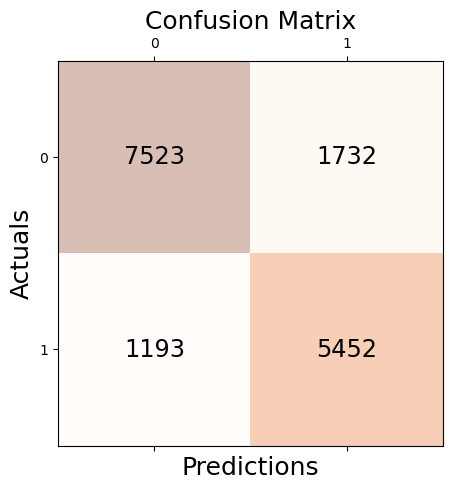

In [59]:
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [60]:
#precision score:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.759


In [61]:
#recall score:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.820


In [62]:
#accuracy:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.816


In [63]:
#F1-score: 
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.788


Computing this manually for several thresholds:

In [69]:
def statistics(thresh, pred, y_test):
   TP = 0.0
   FP = 0.0
   TN = 0.0
   FN = 0.0
   y_pred = np.where(pred >= thresh, 1, 0)
   for i in range(len(y_pred)):
      if y_pred[i] == y_test[i] and y_test[i] == 1:
         TP += 1
      if y_pred[i] == 1 and y_test[i] != y_pred[i]:
         FP += 1
      if y_test[i] == y_pred[i] and y_pred[i] == 0:
         TN += 1
      if y_pred[i] == 0 and y_test[i] != y_pred[i]:
         FN += 1
   accuracy = (TP + TN)/ (TP + FN + TN + FP)
   precision = TP / (FP + TP)
   recall = TP / (FN + TP)
   F1_score = 2 * precision * recall / (precision + recall)
   return accuracy, precision, recall, F1_score

In [67]:
y_test = y_test.reset_index(drop=True)
y_test

0        0
1        0
2        0
3        0
4        0
        ..
15895    0
15896    0
15897    0
15898    0
15899    0
Name: Adoption, Length: 15900, dtype: int32

In [71]:
acc, prec, rec, F1 = statistics(0.5, prediction, y_test)

0.8160377358490566


### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

In [190]:
threshold = np.arange(0.0, 1.0, 0.01)
print(threshold)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [ ]:
for i, x in enumerate(threshold):
    print(i, x)

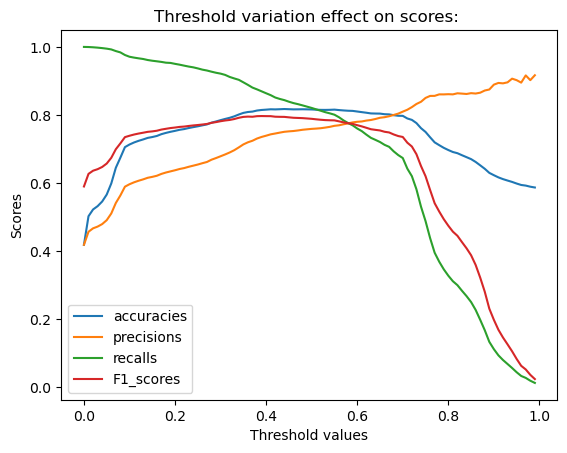

In [78]:
thresholds = np.arange(0.0, 1.0, 0.01) #100 values of threshold btw 0 and 1:
accuracies = []
precisions = []
recalls = []
F1_scores = []
for x in thresholds:
    accuracy, precision, recall, F1_score = statistics(x, prediction, y_test)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    F1_scores.append(F1_score)

plt.plot(thresholds, accuracies, label='accuracies')
plt.plot(thresholds, precisions, label='precisions')
plt.plot(thresholds, recalls, label='recalls')
plt.plot(thresholds, F1_scores, label='F1_scores')
plt.title('Threshold variation effect on scores: ')
plt.ylabel('Scores')
plt.xlabel('Threshold values')
plt.legend()
plt.show()

Recall is prop to decreasing classification threshold. When classification threshold increases, recall decreases, as well as F1 score while the precision increases which is logical bc it represents the fraction of positive that are actually positive, and increasing the classification threshold will increase the TP frequency among positive predictions. The accuracy increases up to a certain point where it decreases again. 

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

In [79]:
from itertools import cycle

Feature: 0, Score: 0.54242
Feature: 1, Score: -0.67512
Feature: 2, Score: -0.00342
Feature: 3, Score: 0.09702
Feature: 4, Score: 0.01769
Feature: 5, Score: -1.38999
Feature: 6, Score: -1.58619
Feature: 7, Score: 2.10055
Feature: 8, Score: 2.15125
Feature: 9, Score: -1.47508
Feature: 10, Score: 2.52768
Feature: 11, Score: -1.21285
Feature: 12, Score: -1.25508
Feature: 13, Score: -0.25922
Feature: 14, Score: 0.39623
Feature: 15, Score: -0.46482
Feature: 16, Score: -0.18974
Feature: 17, Score: 0.24038
Feature: 18, Score: 0.02848
Feature: 19, Score: -0.04418
Feature: 20, Score: 0.11402
Feature: 21, Score: -0.27983
Feature: 22, Score: -0.27712
Feature: 23, Score: 1.55654
Feature: 24, Score: -0.97262
Feature: 25, Score: 0.67801
Feature: 26, Score: -1.18428
Feature: 27, Score: 1.10966
Feature: 28, Score: 1.01540
Feature: 29, Score: -0.50104
Feature: 30, Score: -0.34841
Feature: 31, Score: -1.47508
[(1.0, 0.0, 0), (0.967741935483871, 0.03225806451612903, 0), (0.935483870967742, 0.0645161290322

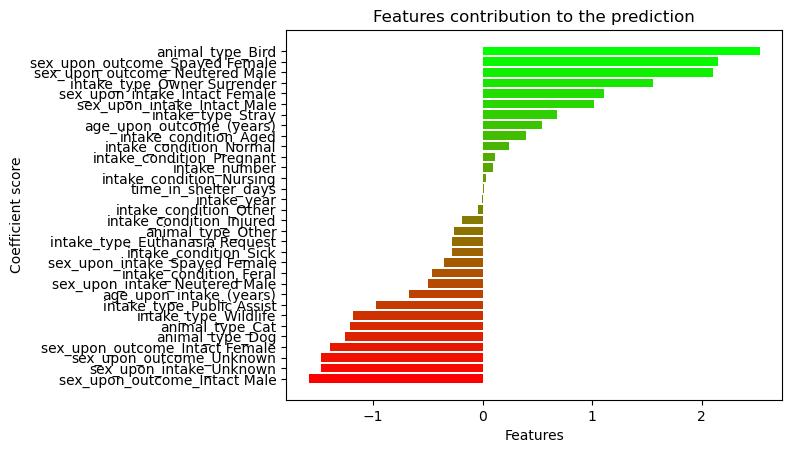

In [104]:
# get importance
importance = logistic.coef_[0]
df = pd.DataFrame(data = np.array([importance, X_train.columns]).T, columns = ['coef', 'name'])
df = df.sort_values(by = 'coef')
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20c.colors)
fig, ax = plt.subplots()
# plot feature importance
#cycol = cycle('cmk')
gradient = np.linspace(0, 1, 32)
rgbs = [(1-i,i,0) for i in gradient]
print(rgbs)
#for i, x in enumerate(df.coef.index):
#color = next(cycol)
ax.barh(df.name, df.coef, align='center', color = rgbs)
plt.title('Features contribution to the prediction')
plt.ylabel('Coefficient score')
plt.xlabel('Features')
plt.show()

In [174]:
df

,coef,name
6,-1.586187,sex_upon_outcome_Intact Male
31,-1.475083,sex_upon_intake_Unknown
9,-1.475083,sex_upon_outcome_Unknown
5,-1.389995,sex_upon_outcome_Intact Female
12,-1.255083,animal_type_Dog
11,-1.212853,animal_type_Cat
26,-1.184275,intake_type_Wildlife
24,-0.972621,intake_type_Public Assist
1,-0.675119,age_upon_intake_(years)
29,-0.501036,sex_upon_intake_Neutered Male


In [ ]:
for i, x in enumerate(df.coef.index):
	#color = next(cycol)
    print(df.name)
    print(df.coef[x])

<AxesSubplot:xlabel='coef', ylabel='name'>

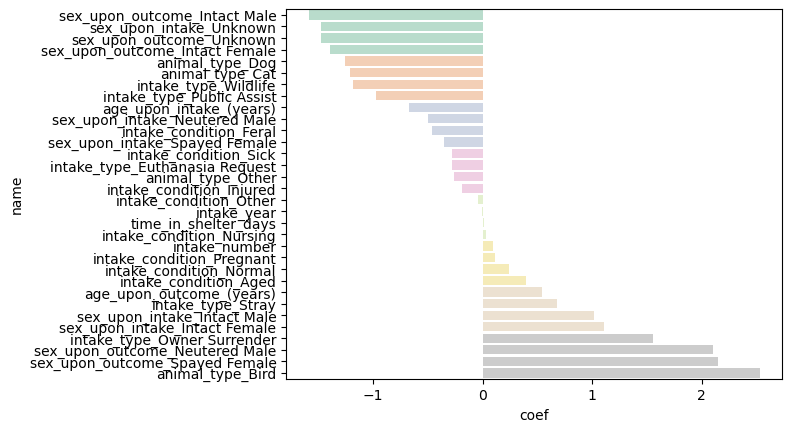

In [176]:
#using seaborn:
df = pd.DataFrame(data = np.array([(logistic.coef_)[0], X_train.columns]).T, columns = ['coef', 'name'])
df.head()
sn.barplot(data = df, y=df.name, x=df.coef, orient='h', order = df.sort_values(by = 'coef').name)


## Question 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- a) F1 Score
- b) Recall
- c) Precision
- d) Accuracy

In [ ]:
#F1 score

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- d) True positive rate is 0.95

In [ ]:
# d)

Accuracy = (TP + TN) / N 

In [12]:
TP = 100
FP = 10
FN = 5
TN = 50

In [26]:
#autre exemple:
TP = 50
FP = 100
FN = 50
TN = 55

In [13]:
N = (TP+TN+FP+FN)
N

165

In [4]:
Accuracy = (TP+TN)/N
Accuracy

0.9090909090909091

In [5]:
Precision = TP / (FP + TP)
Precision

0.9090909090909091

In [6]:
Recall = TP / (FN + TP)
Recall

0.9523809523809523

In [7]:
F1_Score = 2 * Precision * Recall / (Precision + Recall)
F1_Score

0.9302325581395349

In [18]:
TPR = TP/(TP+FN)
TPR

0.9523809523809523

In [20]:
FPR = FP/(TN+FP)
TPR

0.8333333333333334